## Workbook 03A_Sentiment_Analysis_Logistic
This workbook contains code for the third model attempting to carry out Sentiment Analysis - Logistic Regression. Logistic Regression is a supervised classification model and it is chosen to be one of our models as it is fast and is a simple classifier.

The Logistic Regression is conducted using topic_modelling.csv file which contains all the reviews of Witcher Game. 


## Logistic Regression

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize



### Importing dataset

In [2]:
steam_df = pd.read_csv('./topic_modelling.csv',index_col=0)
steam_df.reset_index(drop=True, inplace=True)
steam_df.head()

,app_id,app_name,review_id,language,review,recommended,author.steamid,author.playtime_at_review,review_length,clean_review,clean_review_str,bigram_review,trigram_review
0,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1.0,76561199054755373,5524.0,12,"['one', 'rpg', 'time', 'worthy', 'collection']",one rpg time worthy collection,"['one_rpg', 'rpg_time', 'time_worthy', 'worthy...","['one_rpg_time', 'rpg_time_worthy', 'time_wort..."
1,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1.0,76561198170193529,823.0,7,"['story', 'graphic']",story graphic,['story_graphic'],[]
2,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1.0,76561198065591528,23329.0,11,"['favorite', 'time', 'cant', 'wait', 'nexgen',...",favorite time cant wait nexgen versiion,"['favorite_time', 'time_cant', 'cant_wait', 'w...","['favorite_time_cant', 'time_cant_wait', 'cant..."
3,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1.0,76561198996835044,8557.0,5,"['would', 'get']",would get,['would_get'],[]
4,292030,The Witcher 3: Wild Hunt,85177892,english,"Very Fun, Would play again!",1.0,76561198040190687,20092.0,5,"['fun', 'would']",fun would,['fun_would'],[]


In [3]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103274 entries, 0 to 103273
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   app_id                     103274 non-null  int64  
 1   app_name                   103274 non-null  object 
 2   review_id                  103274 non-null  int64  
 3   language                   103274 non-null  object 
 4   review                     103274 non-null  object 
 5   recommended                103274 non-null  float64
 6   author.steamid             103274 non-null  int64  
 7   author.playtime_at_review  103274 non-null  float64
 8   review_length              103274 non-null  int64  
 9   clean_review               103274 non-null  object 
 10  clean_review_str           101488 non-null  object 
 11  bigram_review              103274 non-null  object 
 12  trigram_review             103274 non-null  object 
dtypes: float64(2), int64(4), obje

In [4]:
# changing recommended column data type from float type to int type
steam_df['recommended'] = steam_df['recommended'].astype(int)


## Preprocessing: Tokenization
Tokenization involves converting text into smaller units called tokens. For instance, a document is broken down into paragraphs, then sentence into words. In this scenario, we are tokenizing specifically into words. Following tokenization, additional preprocessing tasks such as filtering out unnecessary tokens, which might introduce noise, become more manageable.

In [5]:
steam_df.review[0]


"One of the best RPG's of all time, worthy of any collection"

In [6]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(steam_df.review[0])
print(tokens)

['One', 'of', 'the', 'best', 'RPG', "'s", 'of', 'all', 'time', ',', 'worthy', 'of', 'any', 'collection']


## Stopwords
Removal of stopwords to increase model performance in order not to include noise in our model training

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

print([i for i in tokens if i not in stop_words])

['One', 'best', 'RPG', "'s", 'time', ',', 'worthy', 'collection']


## Preprocessing: Normalization
### 1. Casing the Characters
Converting character to the same case so the same words are recognised as the same. In this case we converted to lowercase. 

In [8]:
steam_df.review[3]


"Why wouldn't you get this"

In [9]:
lower_case = steam_df.review[3].lower()
lower_case

"why wouldn't you get this"

## 1. Negation handling
A dictionary containing the most frequently encountered apostrophe-linked words is developed to address negation. NLP will break down the word aren't into are and n't which are not accurate. Negation handling helps to preserve the meaning of the text.

In [10]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [11]:
words = lower_case.split()
reformed = [appos[word] if word in appos else word for word in words]
reformed = " ".join(reformed) 
reformed

'why would not you get this'

## Removal of tokens
Keeping only alphabetical words as punctuations, special characters and numerical tokens do not contribute to sentiment.

In [12]:
tokens

['One',
 'of',
 'the',
 'best',
 'RPG',
 "'s",
 'of',
 'all',
 'time',
 ',',
 'worthy',
 'of',
 'any',
 'collection']

In [13]:
words = [word for word in tokens if word.isalpha()]
words

['One',
 'of',
 'the',
 'best',
 'RPG',
 'of',
 'all',
 'time',
 'worthy',
 'of',
 'any',
 'collection']

## Lemmatization
Lemmatization is a normalization process which helps to ensure that words with similar forms but different meanings are appropriately managed. Words within a text are pinpointed through word-category disambiguation, wherein both the definition of the word and its context are considered to determine its specific Part-of-Speech (POS) tag.

In [14]:
words


['One',
 'of',
 'the',
 'best',
 'RPG',
 'of',
 'all',
 'time',
 'worthy',
 'of',
 'any',
 'collection']

In [15]:
tagsText = nltk.pos_tag(words)
tagsText


[('One', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('RPG', 'NN'),
 ('of', 'IN'),
 ('all', 'DT'),
 ('time', 'NN'),
 ('worthy', 'NN'),
 ('of', 'IN'),
 ('any', 'DT'),
 ('collection', 'NN')]

In [16]:
steam_df.head()

,app_id,app_name,review_id,language,review,recommended,author.steamid,author.playtime_at_review,review_length,clean_review,clean_review_str,bigram_review,trigram_review
0,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1,76561199054755373,5524.0,12,"['one', 'rpg', 'time', 'worthy', 'collection']",one rpg time worthy collection,"['one_rpg', 'rpg_time', 'time_worthy', 'worthy...","['one_rpg_time', 'rpg_time_worthy', 'time_wort..."
1,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1,76561198170193529,823.0,7,"['story', 'graphic']",story graphic,['story_graphic'],[]
2,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1,76561198065591528,23329.0,11,"['favorite', 'time', 'cant', 'wait', 'nexgen',...",favorite time cant wait nexgen versiion,"['favorite_time', 'time_cant', 'cant_wait', 'w...","['favorite_time_cant', 'time_cant_wait', 'cant..."
3,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1,76561198996835044,8557.0,5,"['would', 'get']",would get,['would_get'],[]
4,292030,The Witcher 3: Wild Hunt,85177892,english,"Very Fun, Would play again!",1,76561198040190687,20092.0,5,"['fun', 'would']",fun would,['fun_would'],[]


In [17]:
def cleaning_function(reviews):
    all_ = []
    
    for sent in reviews:
        sent_lower = sent.lower()
        
        # Replace apostrophe with words
        sent_list = sent_lower.split()
        split = [appos[word] if word in appos else word for word in sent_list]
        reformed = " ".join(split) 

        # POS Tags
        words = reformed.split()  # Split the string into a list of words
        tagsText = nltk.pos_tag(words)  # Pass the list of words to nltk.pos_tag()
        all_.append(tagsText)

    return all_


def separate_word_tag(df_pos_test):
    words = []
    types = []
    for row in df_pos_test:
        sent = []
        type_ = []
        for word, tag in row:
            sent.append(word)
            type_.append(tag)

        words.append(' '.join(word for word in sent))
        types.append(' '.join(word for word in type_))

    df = pd.DataFrame({'lem_words': words, 'lem_tags': types})
    return df


cleaning_function(steam_df['review'])


[[('one', 'CD'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('best', 'JJS'),
  ("rpg's", 'NN'),
  ('of', 'IN'),
  ('all', 'DT'),
  ('time,', 'JJ'),
  ('worthy', 'NN'),
  ('of', 'IN'),
  ('any', 'DT'),
  ('collection', 'NN')],
 [('good', 'JJ'),
  ('story,', 'NN'),
  ('good', 'JJ'),
  ('graphics.', 'NN'),
  ('lots', 'NNS'),
  ('to', 'TO'),
  ('do.', 'VB')],
 [('favorite', 'JJ'),
  ('game', 'NN'),
  ('of', 'IN'),
  ('all', 'DT'),
  ('time', 'NN'),
  ('cant', 'JJ'),
  ('wait', 'NN'),
  ('for', 'IN'),
  ('the', 'DT'),
  ('nexgen', 'NN'),
  ('versiion', 'NN')],
 [('why', 'WRB'),
  ('would', 'MD'),
  ('not', 'RB'),
  ('you', 'PRP'),
  ('get', 'VBP'),
  ('this', 'DT')],
 [('very', 'RB'),
  ('fun,', 'RB'),
  ('would', 'MD'),
  ('play', 'VB'),
  ('again!', 'NN')],
 [('the', 'DT'),
  ('game', 'NN'),
  ('is', 'VBZ'),
  ('enjoyable', 'JJ'),
  ('enough', 'RB'),
  ('but...', 'NN'),
  ('-combat', 'NN'),
  ('has', 'VBZ'),
  ('plenty', 'NN'),
  ('of', 'IN'),
  ('options', 'NNS'),
  ('but', 'CC'),
  ('the', 'DT'

In [18]:
# take some time to run
word_tag = cleaning_function(steam_df['review'])
lemm_df = separate_word_tag(word_tag)
lemm_df.head()





,lem_words,lem_tags
0,"one of the best rpg's of all time, worthy of a...",CD IN DT JJS NN IN DT JJ NN IN DT NN
1,"good story, good graphics. lots to do.",JJ NN JJ NN NNS TO VB
2,favorite game of all time cant wait for the ne...,JJ NN IN DT NN JJ NN IN DT NN NN
3,why would not you get this,WRB MD RB PRP VBP DT
4,"very fun, would play again!",RB RB MD VB NN


In [19]:
print(len(lemm_df))
print(len(steam_df))
print(len(word_tag))


103274
103274
103274


In [20]:
# concat cleaned text with original
df_training = pd.concat([steam_df, lemm_df], axis=1)
df_training['word_tags'] = word_tag
df_training.head()

,app_id,app_name,review_id,language,review,recommended,author.steamid,author.playtime_at_review,review_length,clean_review,clean_review_str,bigram_review,trigram_review,lem_words,lem_tags,word_tags
0,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1,76561199054755373,5524.0,12,"['one', 'rpg', 'time', 'worthy', 'collection']",one rpg time worthy collection,"['one_rpg', 'rpg_time', 'time_worthy', 'worthy...","['one_rpg_time', 'rpg_time_worthy', 'time_wort...","one of the best rpg's of all time, worthy of a...",CD IN DT JJS NN IN DT JJ NN IN DT NN,"[(one, CD), (of, IN), (the, DT), (best, JJS), ..."
1,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1,76561198170193529,823.0,7,"['story', 'graphic']",story graphic,['story_graphic'],[],"good story, good graphics. lots to do.",JJ NN JJ NN NNS TO VB,"[(good, JJ), (story,, NN), (good, JJ), (graphi..."
2,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1,76561198065591528,23329.0,11,"['favorite', 'time', 'cant', 'wait', 'nexgen',...",favorite time cant wait nexgen versiion,"['favorite_time', 'time_cant', 'cant_wait', 'w...","['favorite_time_cant', 'time_cant_wait', 'cant...",favorite game of all time cant wait for the ne...,JJ NN IN DT NN JJ NN IN DT NN NN,"[(favorite, JJ), (game, NN), (of, IN), (all, D..."
3,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1,76561198996835044,8557.0,5,"['would', 'get']",would get,['would_get'],[],why would not you get this,WRB MD RB PRP VBP DT,"[(why, WRB), (would, MD), (not, RB), (you, PRP..."
4,292030,The Witcher 3: Wild Hunt,85177892,english,"Very Fun, Would play again!",1,76561198040190687,20092.0,5,"['fun', 'would']",fun would,['fun_would'],[],"very fun, would play again!",RB RB MD VB NN,"[(very, RB), (fun,, RB), (would, MD), (play, V..."


## Convert sentiment to numerical values


In [21]:
print(steam_df['recommended'].value_counts())

recommended
1    100881
0      2393
Name: count, dtype: int64


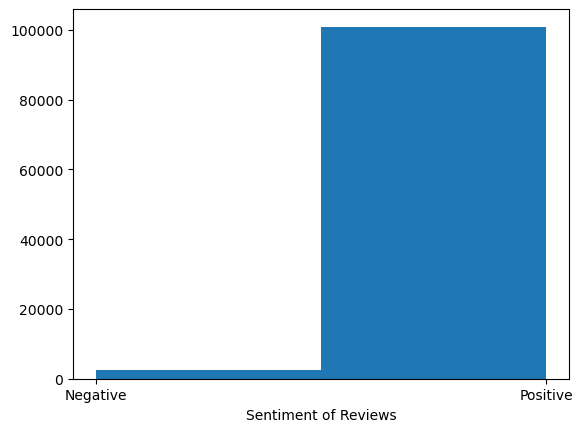

In [22]:
plt.hist(steam_df.recommended, bins=2, align='mid')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Assuming 0 represents Negative and 1 represents Positive
plt.xlabel('Sentiment of Reviews')
plt.show()



## Train Test Split & Bootstrapping



In assessing our model, we partition the data into Training and Testing sets. We employ a test_size argument set to 0.3, representing a 70/30 ratio. The training data is subsequently utilized to refine our model via cross-validation.

As demonstrated by the sentiment distribution above, class imbalances can pose challenges when evaluating accuracy, as each class may have distinct baseline values. To address this, we implement a resampling technique known as bootstrapping, which involves sampling with replacement. The less represented classes are upsampled, while the remaining positive class is downsampled to 100000.

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(steam_df, test_size=0.3, random_state=1)
t_1 = train[train['recommended']==0].sample(100000,replace=True)
t_2 = train[train['recommended']==1].sample(100000,replace=True)
training_bs = pd.concat([t_1, t_2])
print(train.shape)
print(training_bs.shape)
print(test.shape)
# sanity check 
steam_df.shape[0] == (train.shape[0] + test.shape[0])

(72291, 13)
(200000, 13)
(30983, 13)


True

- train.shape = The first output represents the output <b>before</b> bootstrapping was done which consists only of 72291 training data and 10 columns.
- training_bs.shape = The second output represents the output <b>after</b> bootstrapping (resampling with replacement) was done which consists of 100000 samples each. It totals up to 200000 rows and 10 columns.
- test.shape = The third output represents the test dataset which will be used to validate the model.

## Baseline Accuracy


The baseline accuracy is the proportion of the majority class. Before bootstrapping ‘1’ which is positive sentiment gives us the baseline at 0.976871. After Bootstrapping all the classes the accuracy to predict each of the classes balances so the baseline accuracy is 0.5 for each class.

In [24]:
print(train['recommended'].value_counts(normalize=True))

recommended
1    0.976871
0    0.023129
Name: proportion, dtype: float64


In [25]:
print(training_bs['recommended'].value_counts(normalize=True))

recommended
0    0.5
1    0.5
Name: proportion, dtype: float64


## Baseline Accuracy
The baseline accuracy is the proportion of the majority class. In this case '1' which is positive sentiment and so the baseline accuracy is 0.5
baseline_accuracy = majority class N / total N

baseline accuracy equals to 0.504405 by taking majority positive sentiment reviews count 100881 then divide by total N 200000


In [26]:
# print(training_bs['recommended'].value_counts(normalize=True))
baseline = 0.5

In [27]:
print(training_bs.isnull().sum())


app_id                          0
app_name                        0
review_id                       0
language                        0
review                          0
recommended                     0
author.steamid                  0
author.playtime_at_review       0
review_length                   0
clean_review                    0
clean_review_str             2278
bigram_review                   0
trigram_review                  0
dtype: int64


In [28]:
## Set up x and y
X_train = df_training['lem_words']
y_train = df_training['recommended']
#set up baseline 
print(X_train.shape)
print(y_train.shape)

(103274,)
(103274,)


## Tfidf Vectorizer
TF-IDF Vectorizer transforms words into vectors by considering both the frequency of a word within a specific document and its frequency across all documents. Consequently, common words appearing frequently across documents are given less importance, while rare words are emphasized, indicating their high specificity to individual documents.

In [29]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

lr = LogisticRegression(random_state=1, solver='sag', max_iter=1000)

# initalise the vectoriser 
tvec = TfidfVectorizer()
# fit the training data on the model
tvec.fit(X_train)

#transform training data into sparse matrix
X_train_tvec = tvec.transform(X_train)
# X_train_tvec

# cross val score/ predict
tvec_score = cross_val_score(lr, X_train_tvec, y_train, cv=3)


## Count Vectorizer
Count vectoriser is a basic vectoriser which takes every token (in this case a word) from our data and is turned into a feature. As a whole it converts a collection of text documents to a sparse matrix of token counts.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
# initalise the vectoriser 
cvec = CountVectorizer()
# fit the training data on the model
cvec.fit(X_train)

#transform training data into sparse matrix
X_train_cvec = cvec.transform(X_train)

# cross val score/ predict
cvec_score = cross_val_score(lr, X_train_cvec, y_train, cv=3 )
X_train_cvec


/Users/ahminhui/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahminhui/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahminhui/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<103274x64719 sparse matrix of type '<class 'numpy.int64'>'
	with 3642383 stored elements in Compressed Sparse Row format>

In [31]:
# df_cvec = pd.DataFrame(X_train_cvec.todense(),columns=cvec.get_feature_names_out())
# print(df_cvec.shape)
# df_cvec.head()


## Compare Results
Both vectorisers increased the accuracy using a logistic regression model. However, the TFIDF Vectorizer had the highest accuracy score so was chosen for Feature Transformation.

In [32]:
print('Baseline:', baseline)
print('Tfidf Vectorizer Score:', tvec_score.mean())
print('Count Vectorizer Score:', cvec_score.mean())
acc_list = []
acc_list.append(cvec_score.mean())
acc_list.append(tvec_score.mean())

# DataFrame Accuracy 
acc_df = pd.DataFrame()
acc_df['params']= ['cvec', 'tvec']
acc_df['scores']= acc_list
acc_df

Baseline: 0.5
Tfidf Vectorizer Score: 0.9804113313613145
Count Vectorizer Score: 0.9664774740427843


,params,scores
0,cvec,0.966477
1,tvec,0.980411


## Tuning Hyperparameters of TFIDF Vectorizer


Hyper parameters help us tune a model from the default conditions. n-gram range, max features and max df were investigated to see which conditions would give a higher accuracy score. Below are the packages used in the tuning and vectorisation of the words.

In [33]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

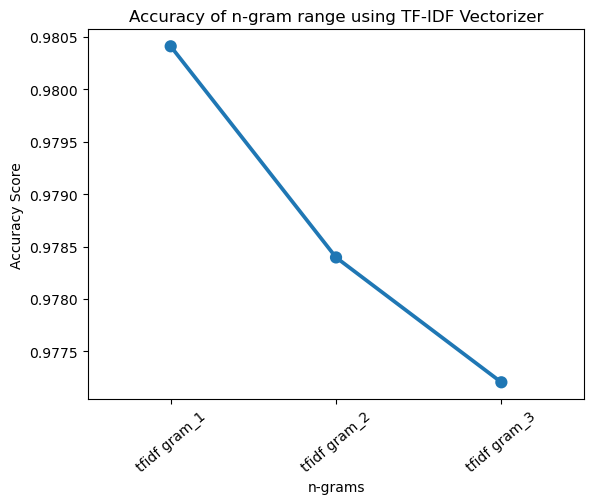

In [34]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

def tfidf_vec_ngram(params, X_train, y_train):
    tfidf_vec = TfidfVectorizer(ngram_range=params) 
    X_train_tfidf = tfidf_vec.fit_transform(X_train)

    # cross val score/ predict
    tfidf_score = cross_val_score(lr, X_train_tfidf, y_train, cv=3)

    # cross validation 
    return tfidf_score.mean()

params = [(1,1), (1,2), (1,3)] 
ngram_scores = []
for p in params:
    ngram_scores.append(tfidf_vec_ngram(p, X_train, y_train))
    
ngrams = ['tfidf gram_1', 'tfidf gram_2', 'tfidf gram_3']
ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2])

# plot scores on graph
sns.pointplot(x='params', y='scores', data=ngram_df)
plt.ylabel('Accuracy Score')
plt.xlabel('n-grams')
plt.xticks(rotation=40)
plt.title('Accuracy of n-gram range using TF-IDF Vectorizer')
plt.show()


### ngram
As demonstrated earlier, when examining the most frequent words, individual tokens may not convey as much information as combinations of two or three tokens. The concept of N-gram range involves considering a range of n tokens to utilize as features.

For instance:

(1,1) by default, employs only single tokens.
(1,2) represents bigrams, utilizing both single and double tokens.
(1,3) indicates trigrams, incorporating single, double, and triple tokens.

The analysis revealed that the highest accuracy was achieved with the (1,1) unigram approach, as depicted below.



In [35]:
# update accuracy scores with highest score for 1,2 ngram
acc_df1 = pd.concat([acc_df, ngram_df], ignore_index=True)
acc_df1.reset_index(inplace=True, drop=True)
acc_df1

,params,scores
0,cvec,0.966477
1,tvec,0.980411
2,tfidf gram_1,0.980411
3,tfidf gram_2,0.978397
4,tfidf gram_3,0.977206


## Max Features

TF-IDF Vectorizer transforms each token into a predictive feature, and with text data, this feature size could be in the thousands or even millions. Max Features is a parameter that will limit how many of these features we can use as predictors. When used in conjunction with n-grams, it also helps identify the most significant features based on their frequency.

From the range of max features, 5000 features yields the highest accuracy. This is because, as you increase the max features, you provide the model with more words to train on, thereby increasing its accuracy.

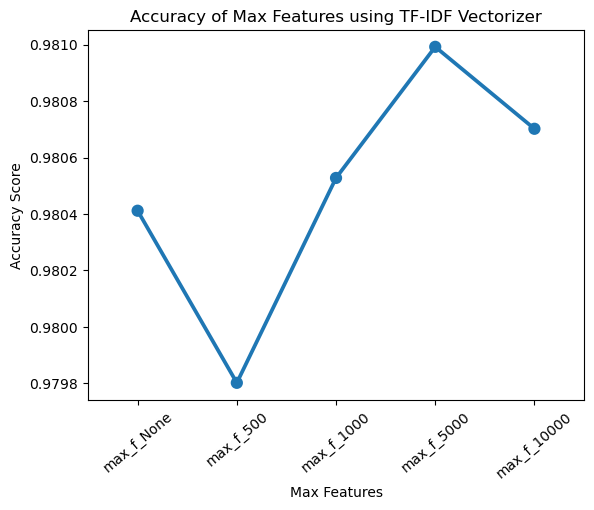

In [36]:
def tfidf_vec_max_features(params, X_train, y_train):
    tfidf_vec = TfidfVectorizer(max_features=params)
    X_train_tfidf = tfidf_vec.fit_transform(X_train)
    tfidf_score = cross_val_score(lr, X_train_tfidf, y_train, cv=3)
    return tfidf_score.mean()

mf_params = [None, 500, 1000, 5000, 10000]
max_features_scores = [tfidf_vec_max_features(p, X_train, y_train) for p in mf_params]
max_features = ['max_f_'+str(p) for p in mf_params]
# DataFrame for scores
max_features_df = pd.DataFrame({'params': max_features, 'scores': max_features_scores})

# Plotting the accuracy of max features
sns.pointplot(x='params', y='scores', data=max_features_df)
plt.ylabel('Accuracy Score')
plt.xlabel('Max Features')
plt.xticks(rotation=40)
plt.title('Accuracy of Max Features using TF-IDF Vectorizer')
plt.show()


In [37]:
# Append max_features_df to acc_df
acc_df2 = pd.concat([acc_df1, max_features_df], ignore_index=True)

# Reset the index
acc_df2.reset_index(drop=True, inplace=True)

acc_df2


,params,scores
0,cvec,0.966477
1,tvec,0.980411
2,tfidf gram_1,0.980411
3,tfidf gram_2,0.978397
4,tfidf gram_3,0.977206
5,max_f_None,0.980411
6,max_f_500,0.979801
7,max_f_1000,0.980528
8,max_f_5000,0.980992
9,max_f_10000,0.980702


## Max df
This is the threshold of the Maximum Document frequency of a token. This can help limit the words that may appear too frequently in a corpus. Another way of looking at it is corpus-specific stop words.



In [38]:
# ignore terms that appear in more than 50% of the documents
max_df = 0.50
# ignore terms that appear in more than 25 documents
max_df = 25
# DEFAULT
# ignore terms that appear in more than 100% of the documents 
# doesnt ignore anything 
max_df = 1.0 

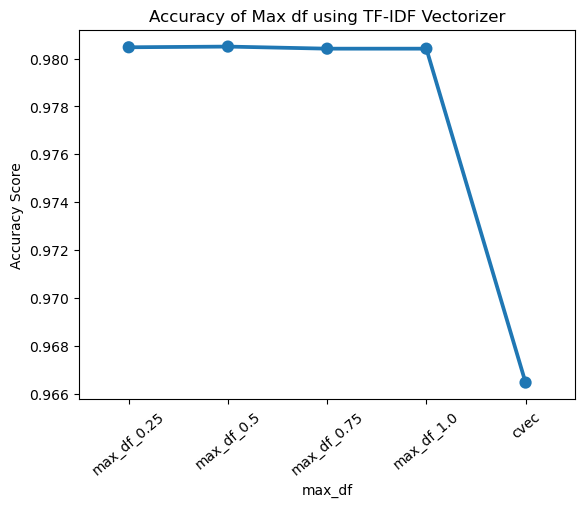

In [39]:
def tfidf_vec_max_df(params, X_train, y_train):
    tfidf_vec = TfidfVectorizer(max_df=params)
    X_train_tfidf = tfidf_vec.fit_transform(X_train)
    tfidf_score = cross_val_score(lr, X_train_tfidf, y_train, cv=3)
    return tfidf_score.mean()

mdf_params = [0.25, 0.5, 0.75, 1.0]
max_df_scores = [tfidf_vec_max_df(p, X_train, y_train) for p in mdf_params]
max_df = ['max_df_'+str(p) for p in mdf_params]
# DataFrame for scores
max_df_df = pd.DataFrame({'params': max_df, 'scores': max_df_scores})

# Adding tfidf score with default params
max_df_df = pd.concat([max_df_df, acc_df.iloc[:1, :]], ignore_index=True)

sns.pointplot(x='params', y='scores', data=max_df_df)
plt.ylabel('Accuracy Score')
plt.xlabel('max_df')
plt.xticks(rotation=40)
plt.title('Accuracy of Max df using TF-IDF Vectorizer')
plt.show()



In [43]:
# update accuracy dataframe
acc_df3 = pd.concat([acc_df2,max_df_df])
acc_df3.reset_index(inplace=True, drop=True)
acc_df3

,params,scores
0,cvec,0.966477
1,tvec,0.980411
2,tfidf gram_1,0.980411
3,tfidf gram_2,0.978397
4,tfidf gram_3,0.977206
5,max_f_None,0.980411
6,max_f_500,0.979801
7,max_f_1000,0.980528
8,max_f_5000,0.980992
9,max_f_10000,0.980702


## Comparing Highest Parameters


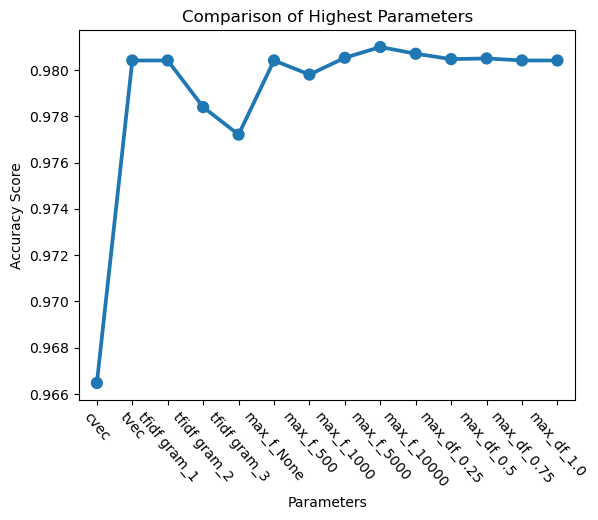

In [41]:
sns.pointplot(x='params', y='scores', data =acc_df3)
plt.ylabel('Accuracy Score')
plt.xlabel('Parameters')
plt.xticks(rotation=-50)
plt.title('Comparison of Highest Parameters')
plt.show()

I compared the accuracy of the highest parameters the results are below:

- ngram range = (1,1): Unigram had the highest score
- max_features: 5000 features resulted in the highest score
- max_df : max_df = 0.25 has the highest scre

## Logistic regression optimisation

Having determined the optimal parameters for my Vectorizer, including an n-gram range of (1,1) and a maximum of 5000 features, my next step is to refine my model using LogisticRegressionCV. This involves comparing regularization techniques such as Lasso and Ridge.

Regularization serves to systematically mitigate overfitting in the model by introducing a penalty on the coefficients within the loss function. As the loss function is minimized, this supplementary component is subsequently integrated into the residual sum of squares.


In [42]:
# Transform features once using TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(ngram_range=(1,4))
X_train_tfidf = tfidf_vec.fit_transform(X_train)

from sklearn.linear_model import LogisticRegressionCV

# Fit with L1 regularization
model_l1 = LogisticRegressionCV(Cs=np.logspace(-10,10,21), penalty='l1', solver='liblinear', cv=3, max_iter=1000) 
model_l1.fit(X_train_tfidf, y_train)


LogisticRegressionCV(Cs=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                     cv=3, max_iter=1000, penalty='l1', solver='liblinear')

In [45]:
# fit with l2
model_l2 = LogisticRegressionCV(Cs=np.logspace(-10,10,21), penalty = 'l2',solver='liblinear',cv=3, max_iter=1000) 
model_l2.fit(X_train_tfidf, y_train)

LogisticRegressionCV(Cs=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                     cv=3, max_iter=1000, solver='liblinear')

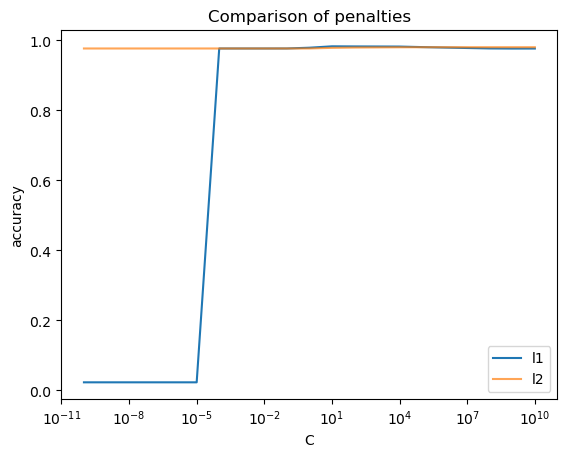

In [46]:
plt.plot(model_l1.Cs_, list(model_l1.scores_.values())[0].mean(axis=0), label='l1')
plt.plot(model_l2.Cs_, list(model_l2.scores_.values())[0].mean(axis=0), alpha=0.7, label='l2')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Comparison of penalties')
plt.show()


# Discussion

Overall L2, known as Ridge regression generally holds a higher and more stable accuracy.

## Conclusion

From all the 3 sentiment analysis models, it could be seen that Logistic Regression  has the highest accuracy with an accuracy score of 0.98, followed by lexicon-based VADER model with accuracy score of 0.7289056296841412
 and lastly Naives bayes classifier with accuracy score 0.2861892005293225
 
 